In [1]:
# Import dependencies
import pandas as pd
import numpy as np
pd.set_option('max_colwidth', 400)

# Import Datasets

In [2]:
zipcode_prices = pd.read_csv('Resource/Zipcode_price.csv')
zipcode_prices

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2000-01-31,...,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31
0,91982,1,77494,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,209048.790580,...,471385.326722,470094.099251,469065.556757,470268.040235,472257.943107,475361.948918,478138.444450,480601.210512,482411.387838,483644.709033
1,61148,2,8701,zip,NJ,NJ,Lakewood,"New York-Newark-Jersey City, NY-NJ-PA",Ocean County,137886.463799,...,527727.482336,529947.403462,532846.215822,537015.420626,542395.542666,548357.302256,554489.247144,560407.160599,566757.356522,574127.832246
2,91940,3,77449,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Harris County,102129.420943,...,278195.430561,275880.290491,274043.954520,272863.082137,272388.856446,272763.356816,273515.337456,274401.485842,274929.000487,274918.911121
3,62080,4,11368,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,150957.229387,...,504476.508141,497473.431981,491025.331919,484268.341352,477023.811433,471521.583059,469663.049583,469656.984977,469088.685776,467022.345948
4,91733,5,77084,zip,TX,TX,Houston,"Houston-The Woodlands-Sugar Land, TX",Harris County,100930.403886,...,270371.788379,268791.042726,267480.620986,266697.212613,266556.111617,267147.680536,267982.228262,268846.207177,269269.787186,269260.239977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26363,63527,39992,14441,zip,NY,NY,Dresden,"Rochester, NY",Yates County,98733.293971,...,203997.629154,203299.688059,203247.787343,204531.065165,207241.697831,210466.274243,213737.650591,215829.370200,217165.755586,217765.293608
26364,64705,39992,16682,zip,PA,PA,Sproul,"Altoona, PA",Blair County,NaN,...,86278.454325,86832.165964,87954.848271,88072.610686,88484.915505,87950.382628,86886.616685,86710.931485,87230.429629,88193.842825
26365,78282,39992,46799,zip,IN,IN,Zanesville,"Bluffton, IN",Wells County,NaN,...,171785.204593,172278.869632,173070.037653,174675.022328,176416.654253,178391.152561,179556.064307,180277.978136,180385.689165,180585.778036
26366,67377,39992,22731,zip,VA,VA,Aroda,"Washington-Arlington-Alexandria, DC-VA-MD-WV",Madison County,NaN,...,330088.082267,329234.829025,328908.160866,330046.915600,332150.814808,335419.029337,338515.209866,341277.587434,343211.456173,344792.119428


In [3]:
zipcode_prices.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'City', 'Metro', 'CountyName', '2000-01-31',
       ...
       '2023-01-31', '2023-02-28', '2023-03-31', '2023-04-30', '2023-05-31',
       '2023-06-30', '2023-07-31', '2023-08-31', '2023-09-30', '2023-10-31'],
      dtype='object', length=295)

In [4]:
zipcode_prices_drop_columns = zipcode_prices.drop(columns=["RegionID","SizeRank","RegionType", "StateName","Metro", "CountyName","2000-01-31",
      "2000-01-31","2000-02-29","2000-03-31","2000-04-30","2000-05-31","2000-06-30","2000-07-31","2000-08-31","2000-09-30","2000-10-31","2000-11-30","2000-12-31",
    "2001-01-31","2001-02-28","2001-03-31","2001-04-30","2001-05-31","2001-06-30","2001-07-31","2001-08-31","2001-09-30","2001-10-31","2001-11-30","2001-12-31",
    "2002-01-31","2002-02-28","2002-03-31","2002-04-30","2002-05-31","2002-06-30","2002-07-31","2002-08-31","2002-09-30","2002-10-31","2002-11-30","2002-12-31",
    "2003-01-31","2003-02-28","2003-03-31","2003-04-30","2003-05-31","2003-06-30","2003-07-31","2003-08-31","2003-09-30","2003-10-31","2003-11-30","2003-12-31",
    "2004-01-31","2004-02-29","2004-03-31","2004-04-30","2004-05-31","2004-06-30","2004-07-31","2004-08-31","2004-09-30","2004-10-31","2004-11-30","2004-12-31",
    "2005-01-31","2005-02-28","2005-03-31","2005-04-30","2005-05-31","2005-06-30","2005-07-31","2005-08-31","2005-09-30","2005-10-31","2005-11-30","2005-12-31",
    "2006-01-31","2006-02-28","2006-03-31","2006-04-30","2006-05-31","2006-06-30","2006-07-31","2006-08-31","2006-09-30","2006-10-31","2006-11-30","2006-12-31",
    "2007-01-31","2007-02-28","2007-03-31","2007-04-30","2007-05-31","2007-06-30","2007-07-31","2007-08-31","2007-09-30","2007-10-31","2007-11-30","2007-12-31",
    "2008-01-31","2008-02-29","2008-03-31","2008-04-30","2008-05-31","2008-06-30","2008-07-31","2008-08-31","2008-09-30","2008-10-31","2008-11-30","2008-12-31",
    "2009-01-31","2009-02-28","2009-03-31","2009-04-30","2009-05-31","2009-06-30","2009-07-31","2009-08-31","2009-09-30","2009-10-31","2009-11-30","2009-12-31",
    "2010-01-31","2010-02-28","2010-03-31","2010-04-30","2010-05-31","2010-06-30","2010-07-31","2010-08-31","2010-09-30","2010-10-31","2010-11-30","2010-12-31",
    "2011-01-31","2011-02-28","2011-03-31","2011-04-30","2011-05-31","2011-06-30","2011-07-31","2011-08-31","2011-09-30","2011-10-31","2011-11-30","2011-12-31",
    "2012-01-31","2012-02-29","2012-03-31","2012-04-30","2012-05-31","2012-06-30","2012-07-31","2012-08-31","2012-09-30","2012-10-31","2012-11-30","2012-12-31",
    "2013-01-31","2013-02-28","2013-03-31","2013-04-30","2013-05-31","2013-06-30","2013-07-31","2013-08-31","2013-09-30","2013-10-31","2013-11-30","2013-12-31",
    "2014-01-31","2014-02-28","2014-03-31","2014-04-30","2014-05-31","2014-06-30","2014-07-31","2014-08-31","2014-09-30","2014-10-31","2014-11-30","2014-12-31"])
zipcode_prices_drop_columns

,RegionName,State,City,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,...,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31
0,77494,TX,Katy,315979.607120,318135.760431,320439.568215,322251.732338,324003.052819,325200.790648,326151.790672,...,471385.326722,470094.099251,469065.556757,470268.040235,472257.943107,475361.948918,478138.444450,480601.210512,482411.387838,483644.709033
1,8701,NJ,Lakewood,266543.450901,268305.915380,270409.472375,272531.855842,275453.833250,278725.393626,282179.774061,...,527727.482336,529947.403462,532846.215822,537015.420626,542395.542666,548357.302256,554489.247144,560407.160599,566757.356522,574127.832246
2,77449,TX,Katy,143199.864622,144808.192541,146478.017729,147946.993556,149285.423125,150552.975744,151766.986253,...,278195.430561,275880.290491,274043.954520,272863.082137,272388.856446,272763.356816,273515.337456,274401.485842,274929.000487,274918.911121
3,11368,NY,New York,350183.183101,351581.297570,353889.263234,355947.856805,358030.601028,359645.944141,362482.957080,...,504476.508141,497473.431981,491025.331919,484268.341352,477023.811433,471521.583059,469663.049583,469656.984977,469088.685776,467022.345948
4,77084,TX,Houston,142705.380423,144330.928184,146001.090907,147519.380078,148888.749981,150216.241791,151424.687790,...,270371.788379,268791.042726,267480.620986,266697.212613,266556.111617,267147.680536,267982.228262,268846.207177,269269.787186,269260.239977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26363,14441,NY,Dresden,121861.748329,121790.843086,121840.403639,122617.500304,123434.128658,124454.024580,125025.175360,...,203997.629154,203299.688059,203247.787343,204531.065165,207241.697831,210466.274243,213737.650591,215829.370200,217165.755586,217765.293608
26364,16682,PA,Sproul,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,86278.454325,86832.165964,87954.848271,88072.610686,88484.915505,87950.382628,86886.616685,86710.931485,87230.429629,88193.842825
26365,46799,IN,Zanesville,89331.000654,89159.304304,88907.410915,88797.942834,88958.438686,89166.549245,89469.790286,...,171785.204593,172278.869632,173070.037653,174675.022328,176416.654253,178391.152561,179556.064307,180277.978136,180385.689165,180585.778036
26366,22731,VA,Aroda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,330088.082267,329234.829025,328908.160866,330046.915600,332150.814808,335419.029337,338515.209866,341277.587434,343211.456173,344792.119428


In [5]:
zipcode_prices_drop_columns = zipcode_prices_drop_columns.dropna()
zipcode_prices_drop_columns

,RegionName,State,City,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,...,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31
0,77494,TX,Katy,315979.607120,318135.760431,320439.568215,322251.732338,324003.052819,325200.790648,326151.790672,...,471385.326722,470094.099251,469065.556757,470268.040235,472257.943107,475361.948918,478138.444450,480601.210512,482411.387838,483644.709033
1,8701,NJ,Lakewood,266543.450901,268305.915380,270409.472375,272531.855842,275453.833250,278725.393626,282179.774061,...,527727.482336,529947.403462,532846.215822,537015.420626,542395.542666,548357.302256,554489.247144,560407.160599,566757.356522,574127.832246
2,77449,TX,Katy,143199.864622,144808.192541,146478.017729,147946.993556,149285.423125,150552.975744,151766.986253,...,278195.430561,275880.290491,274043.954520,272863.082137,272388.856446,272763.356816,273515.337456,274401.485842,274929.000487,274918.911121
3,11368,NY,New York,350183.183101,351581.297570,353889.263234,355947.856805,358030.601028,359645.944141,362482.957080,...,504476.508141,497473.431981,491025.331919,484268.341352,477023.811433,471521.583059,469663.049583,469656.984977,469088.685776,467022.345948
4,77084,TX,Houston,142705.380423,144330.928184,146001.090907,147519.380078,148888.749981,150216.241791,151424.687790,...,270371.788379,268791.042726,267480.620986,266697.212613,266556.111617,267147.680536,267982.228262,268846.207177,269269.787186,269260.239977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26354,98934,WA,Kittitas,133989.236195,134788.326639,134969.672059,135029.511753,135257.491687,135527.834101,135973.028623,...,304245.178454,303627.673572,303684.431732,304973.252665,306832.969148,309083.845870,310957.154515,312720.215301,313231.138909,312442.278725
26357,95419,CA,Camp Meeker,222536.310774,222429.168555,222354.829120,223560.480103,225302.586571,226171.153155,227191.599609,...,446153.854965,448285.330153,452354.525831,457753.174952,463726.747873,468794.767593,471088.424715,470580.548347,465815.796219,462960.751684
26358,22722,VA,Haywood,202227.223856,202719.788479,203038.361866,203799.638337,204268.607979,204818.091487,205133.472689,...,344259.637352,341862.316092,340834.313214,342221.634440,345437.194060,349385.895217,353385.770896,356543.202544,357995.575879,358548.596055
26363,14441,NY,Dresden,121861.748329,121790.843086,121840.403639,122617.500304,123434.128658,124454.024580,125025.175360,...,203997.629154,203299.688059,203247.787343,204531.065165,207241.697831,210466.274243,213737.650591,215829.370200,217165.755586,217765.293608


In [6]:
zipcode_prices_drop_columns = zipcode_prices_drop_columns.rename(columns={'RegionName':'zipcode','State':'state'})

zipcode_prices_drop_columns

,zipcode,state,City,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,...,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31
0,77494,TX,Katy,315979.607120,318135.760431,320439.568215,322251.732338,324003.052819,325200.790648,326151.790672,...,471385.326722,470094.099251,469065.556757,470268.040235,472257.943107,475361.948918,478138.444450,480601.210512,482411.387838,483644.709033
1,8701,NJ,Lakewood,266543.450901,268305.915380,270409.472375,272531.855842,275453.833250,278725.393626,282179.774061,...,527727.482336,529947.403462,532846.215822,537015.420626,542395.542666,548357.302256,554489.247144,560407.160599,566757.356522,574127.832246
2,77449,TX,Katy,143199.864622,144808.192541,146478.017729,147946.993556,149285.423125,150552.975744,151766.986253,...,278195.430561,275880.290491,274043.954520,272863.082137,272388.856446,272763.356816,273515.337456,274401.485842,274929.000487,274918.911121
3,11368,NY,New York,350183.183101,351581.297570,353889.263234,355947.856805,358030.601028,359645.944141,362482.957080,...,504476.508141,497473.431981,491025.331919,484268.341352,477023.811433,471521.583059,469663.049583,469656.984977,469088.685776,467022.345948
4,77084,TX,Houston,142705.380423,144330.928184,146001.090907,147519.380078,148888.749981,150216.241791,151424.687790,...,270371.788379,268791.042726,267480.620986,266697.212613,266556.111617,267147.680536,267982.228262,268846.207177,269269.787186,269260.239977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26354,98934,WA,Kittitas,133989.236195,134788.326639,134969.672059,135029.511753,135257.491687,135527.834101,135973.028623,...,304245.178454,303627.673572,303684.431732,304973.252665,306832.969148,309083.845870,310957.154515,312720.215301,313231.138909,312442.278725
26357,95419,CA,Camp Meeker,222536.310774,222429.168555,222354.829120,223560.480103,225302.586571,226171.153155,227191.599609,...,446153.854965,448285.330153,452354.525831,457753.174952,463726.747873,468794.767593,471088.424715,470580.548347,465815.796219,462960.751684
26358,22722,VA,Haywood,202227.223856,202719.788479,203038.361866,203799.638337,204268.607979,204818.091487,205133.472689,...,344259.637352,341862.316092,340834.313214,342221.634440,345437.194060,349385.895217,353385.770896,356543.202544,357995.575879,358548.596055
26363,14441,NY,Dresden,121861.748329,121790.843086,121840.403639,122617.500304,123434.128658,124454.024580,125025.175360,...,203997.629154,203299.688059,203247.787343,204531.065165,207241.697831,210466.274243,213737.650591,215829.370200,217165.755586,217765.293608


In [7]:
zipcode_prices_drop_columns = zipcode_prices_drop_columns[zipcode_prices_drop_columns["state"]=="TX"]
zipcode_prices_drop_columns

,zipcode,state,City,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,...,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31
0,77494,TX,Katy,315979.607120,318135.760431,320439.568215,322251.732338,324003.052819,325200.790648,326151.790672,...,471385.326722,470094.099251,469065.556757,470268.040235,472257.943107,475361.948918,478138.444450,480601.210512,482411.387838,483644.709033
2,77449,TX,Katy,143199.864622,144808.192541,146478.017729,147946.993556,149285.423125,150552.975744,151766.986253,...,278195.430561,275880.290491,274043.954520,272863.082137,272388.856446,272763.356816,273515.337456,274401.485842,274929.000487,274918.911121
4,77084,TX,Houston,142705.380423,144330.928184,146001.090907,147519.380078,148888.749981,150216.241791,151424.687790,...,270371.788379,268791.042726,267480.620986,266697.212613,266556.111617,267147.680536,267982.228262,268846.207177,269269.787186,269260.239977
5,79936,TX,El Paso,118261.741785,118389.213348,118762.834141,119282.859624,119780.363864,120117.580330,120426.236143,...,194183.512748,194841.550655,195827.987779,197112.322928,199220.853037,201185.953427,202815.935754,204031.945968,204969.245921,205671.722974
7,78660,TX,Pflugerville,202329.890121,204123.183885,206101.503216,207710.115069,209102.573661,210605.268762,212251.119998,...,428313.384187,421730.780802,416458.022046,412677.933004,410247.737085,409181.373844,408234.045731,406973.679546,405133.052510,403383.831527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25431,78672,TX,Tow,109879.517766,111804.290485,113638.678070,114910.966589,115518.491903,115838.839684,115596.248339,...,257074.619716,253502.160601,250449.716497,250604.293827,253198.290170,256439.462740,258665.458820,260615.688054,261292.114485,260657.834317
25648,78147,TX,Floresville,153509.105944,155053.159456,156393.451967,157770.178471,158796.669974,158445.987933,157546.079737,...,229122.022115,227033.380987,225426.401670,225069.950765,225535.143016,226480.285515,226649.666949,226838.924645,226156.125399,225210.245162
25895,78402,TX,Corpus Christi,56260.192674,56568.434669,56934.940619,57396.101870,57847.007516,58319.876477,58825.414376,...,119359.187038,121084.322814,122338.039640,123763.431244,125315.070754,127120.296257,128290.354003,129190.200791,129188.078059,128565.421538
26235,78358,TX,Fulton,140782.247900,141424.522845,142036.252489,143370.421405,145746.847606,148373.586585,150063.046789,...,264775.832889,262268.987859,261412.522723,261506.563968,262929.946252,265401.733397,267224.148542,268603.523201,269305.499343,269167.779024


In [8]:
zipcode_prices_drop_columns.to_csv("output/TX_monthly_House_Pricing.csv", index=False)

In [9]:
Avg_TX_prices = zipcode_prices_drop_columns.copy()


In [10]:
Avg_TX_prices["2015"] = Avg_TX_prices.loc[:, ("2015-01-31","2015-02-28","2015-03-31",
                                                     "2015-04-30","2015-05-31","2015-06-30","2015-07-31","2015-08-31",
                                                     "2015-09-30","2015-10-31","2015-11-30","2015-12-31")].mean(axis = 1)
Avg_TX_prices["2016"] = Avg_TX_prices.loc[:, ("2016-01-31","2016-02-29","2016-03-31",
                                                     "2016-04-30","2016-05-31","2016-06-30","2016-07-31","2016-08-31",
                                                     "2016-09-30","2016-10-31","2016-11-30","2016-12-31")].mean(axis = 1)
Avg_TX_prices["2017"] = Avg_TX_prices.loc[:, ("2017-01-31","2017-02-28","2017-03-31",
                                                     "2017-04-30","2017-05-31","2017-06-30","2017-07-31","2017-08-31",
                                                     "2017-09-30","2017-10-31","2017-11-30","2017-12-31")].mean(axis = 1)
Avg_TX_prices["2018"] = Avg_TX_prices.loc[:, ("2018-01-31","2018-02-28","2018-03-31",
                                                     "2018-04-30","2018-05-31","2018-06-30","2018-07-31","2018-08-31",
                                                     "2018-09-30","2018-10-31","2018-11-30","2018-12-31")].mean(axis = 1)
Avg_TX_prices["2019"] = Avg_TX_prices.loc[:, ("2019-01-31","2019-02-28","2019-03-31",
                                                     "2019-04-30","2019-05-31","2019-06-30","2019-07-31","2019-08-31",
                                                     "2019-09-30","2019-10-31","2019-11-30","2019-12-31")].mean(axis = 1)
Avg_TX_prices["2020"] = Avg_TX_prices.loc[:, ("2020-01-31","2020-02-29","2020-03-31",
                                                     "2020-04-30","2020-05-31","2020-06-30","2020-07-31","2020-08-31",
                                                     "2020-09-30","2020-10-31","2020-11-30","2020-12-31")].mean(axis = 1)
Avg_TX_prices["2021"] = Avg_TX_prices.loc[:, ("2021-01-31","2021-02-28","2021-03-31",
                                                     "2021-04-30","2021-05-31","2021-06-30","2021-07-31","2021-08-31",
                                                     "2021-09-30","2021-10-31","2021-11-30","2021-12-31")].mean(axis = 1)
Avg_TX_prices["2022"] = Avg_TX_prices.loc[:, ("2022-01-31","2022-02-28","2022-03-31",
                                                     "2022-04-30","2022-05-31","2022-06-30","2022-07-31","2022-08-31",
                                                     "2022-09-30","2022-10-31","2022-11-30","2022-12-31")].mean(axis = 1)
Avg_TX_prices["2023"] = Avg_TX_prices.loc[:, ("2023-01-31","2023-02-28","2023-03-31",
                                                     "2023-04-30","2023-05-31","2023-06-30","2023-07-31","2023-08-31",
                                                     "2023-09-30","2023-10-31")].mean(axis = 1)

In [11]:
Avg_TX_prices.columns

Index(['zipcode', 'state', 'City', '2015-01-31', '2015-02-28', '2015-03-31',
       '2015-04-30', '2015-05-31', '2015-06-30', '2015-07-31',
       ...
       '2023-10-31', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022', '2023'],
      dtype='object', length=118)

In [23]:
Avg_TX_prices = Avg_TX_prices[['zipcode', 'state', 'City','2015', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022', '2023']]
Avg_TX_prices

,zipcode,state,City,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,77494,TX,Katy,324287.515039,321896.293200,316498.139655,320464.572048,323809.517111,330947.170852,381345.907007,463206.781614,475322.866682
2,77449,TX,Katy,151032.566765,163981.262606,170701.620906,178898.514943,186724.249020,194306.533420,223289.632501,273262.435954,274389.970588
4,77084,TX,Houston,150282.391882,161698.096385,168185.802473,173451.655144,182589.902424,191187.777675,219787.173817,264213.926930,268240.291946
5,79936,TX,El Paso,120197.975914,122715.876408,126302.678661,128403.432487,132271.221461,140227.003350,159298.832077,184177.530350,199986.103119
7,78660,TX,Pflugerville,211747.344863,232034.453763,244580.152881,252484.659231,258251.741316,275712.956017,372372.389819,458127.731705,412233.384028
...,...,...,...,...,...,...,...,...,...,...,...,...
25431,78672,TX,Tow,114991.798554,119147.291082,125747.675119,139400.887446,144794.195205,158068.483533,201290.678590,260394.836181,256249.963923
25648,78147,TX,Floresville,157067.108462,160683.048999,164035.886674,168614.712342,166364.047559,179562.966414,205451.604664,231808.201009,226352.214622
25895,78402,TX,Corpus Christi,59388.664316,65271.330088,70352.498812,71425.556735,70972.071205,77585.071280,91254.151819,112159.131369,125421.440214
26235,78358,TX,Fulton,148663.954251,160959.719030,169848.918482,180532.671206,186093.906321,202669.510624,233477.383169,262986.381737,265259.653720


In [24]:
Avg_TX_prices_doplicate = Avg_TX_prices.drop_duplicates(subset=['zipcode'])
Avg_TX_prices_doplicate

,zipcode,state,City,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,77494,TX,Katy,324287.515039,321896.293200,316498.139655,320464.572048,323809.517111,330947.170852,381345.907007,463206.781614,475322.866682
2,77449,TX,Katy,151032.566765,163981.262606,170701.620906,178898.514943,186724.249020,194306.533420,223289.632501,273262.435954,274389.970588
4,77084,TX,Houston,150282.391882,161698.096385,168185.802473,173451.655144,182589.902424,191187.777675,219787.173817,264213.926930,268240.291946
5,79936,TX,El Paso,120197.975914,122715.876408,126302.678661,128403.432487,132271.221461,140227.003350,159298.832077,184177.530350,199986.103119
7,78660,TX,Pflugerville,211747.344863,232034.453763,244580.152881,252484.659231,258251.741316,275712.956017,372372.389819,458127.731705,412233.384028
...,...,...,...,...,...,...,...,...,...,...,...,...
25431,78672,TX,Tow,114991.798554,119147.291082,125747.675119,139400.887446,144794.195205,158068.483533,201290.678590,260394.836181,256249.963923
25648,78147,TX,Floresville,157067.108462,160683.048999,164035.886674,168614.712342,166364.047559,179562.966414,205451.604664,231808.201009,226352.214622
25895,78402,TX,Corpus Christi,59388.664316,65271.330088,70352.498812,71425.556735,70972.071205,77585.071280,91254.151819,112159.131369,125421.440214
26235,78358,TX,Fulton,148663.954251,160959.719030,169848.918482,180532.671206,186093.906321,202669.510624,233477.383169,262986.381737,265259.653720


In [25]:
Avg_TX_prices_doplicate.dtypes

zipcode      int64
state       object
City        object
2015       float64
2016       float64
2017       float64
2018       float64
2019       float64
2020       float64
2021       float64
2022       float64
2023       float64
dtype: object

In [26]:
Avg_TX_prices_doplicate = Avg_TX_prices_doplicate.rename(columns={'2015':'P_2015', '2016':'P_2016', '2017':'P_2017', '2018':'P_2018', '2019':'P_2019',
       '2020':'P_2020', '2021':'P_2021', '2022':'P_2022', '2023':'P_2023'})

In [27]:
Avg_TX_prices_doplicate.to_csv("output/TX_AVG_House_Pricing.csv", index=False)

In [28]:
zipcode_income = pd.read_csv('Resource/zipcode-income.csv')
zipcode_income

,statefips,state,zipcode,agi_stub,n1,mars1,mars2,mars4,prep,n2,...,a10300,n85530,a85530,n85300,a85300,n11901,a11901,n11902,a11902,year
0,1,AL,0,1,815440,477700,105350,221200,440830,1296920,...,330066,0,0,0,0,63420,51444,711580,1831661,2016
1,1,AL,0,2,495830,211930,142340,128890,272440,996240,...,984297,0,0,0,0,74090,110889,416090,1173463,2016
2,1,AL,0,3,263390,83420,137870,36340,154880,584000,...,1349246,0,0,0,0,64000,143060,195130,543284,2016
3,1,AL,0,4,167190,29420,124060,10610,99700,421720,...,1425430,0,0,0,0,45020,128920,117410,381329,2016
4,1,AL,0,5,217440,20240,188080,4880,129410,601040,...,3922449,390,155,60,19,82940,423629,126130,506526,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179791,56,WY,99999,2,2020,1100,620,260,1140,3670,...,5088,0,0,0,0,290,489,1610,4057,2016
179792,56,WY,99999,3,1330,570,630,130,820,2720,...,7819,0,0,0,0,280,574,940,2625,2016
179793,56,WY,99999,4,910,280,580,60,640,2070,...,8850,0,0,0,0,210,740,610,2195,2016
179794,56,WY,99999,5,1270,240,1010,40,950,3170,...,24173,0,0,0,0,410,2520,680,3690,2016


In [29]:
zipcode_income.columns

Index(['statefips', 'state', 'zipcode', 'agi_stub', 'n1', 'mars1', 'mars2',
       'mars4', 'prep', 'n2',
       ...
       'a10300', 'n85530', 'a85530', 'n85300', 'a85300', 'n11901', 'a11901',
       'n11902', 'a11902', 'year'],
      dtype='object', length=148)

In [30]:
zipcode_income = zipcode_income[['state', 'zipcode','a02650']]

In [31]:
zipcode_income_drop = zipcode_income.dropna()


In [32]:
TX_income = zipcode_income_drop[zipcode_income_drop['state']=='TX' ]


In [33]:
TX_income = TX_income[TX_income['zipcode'] != 0 ]
TX_income

,state,zipcode,a02650
141093,TX,75001,31081
141094,TX,75001,90700
141095,TX,75001,102876
141096,TX,75001,85846
141097,TX,75001,168009
...,...,...,...
179749,TX,99999,1755394
179750,TX,99999,1610863
179751,TX,99999,1364920
179752,TX,99999,3308250


In [34]:
TX_income = TX_income.rename(columns = {'a02650':'Net_Income'})
TX_income 

,state,zipcode,Net_Income
141093,TX,75001,31081
141094,TX,75001,90700
141095,TX,75001,102876
141096,TX,75001,85846
141097,TX,75001,168009
...,...,...,...
179749,TX,99999,1755394
179750,TX,99999,1610863
179751,TX,99999,1364920
179752,TX,99999,3308250


In [35]:
TX_Income = TX_income[TX_income['zipcode'] != 0 ]
TX_Income

,state,zipcode,Net_Income
141093,TX,75001,31081
141094,TX,75001,90700
141095,TX,75001,102876
141096,TX,75001,85846
141097,TX,75001,168009
...,...,...,...
179749,TX,99999,1755394
179750,TX,99999,1610863
179751,TX,99999,1364920
179752,TX,99999,3308250


In [36]:
TX_Income = TX_Income.rename(columns = {'AVG_income':'Net_Income'})
TX_Income

,state,zipcode,Net_Income
141093,TX,75001,31081
141094,TX,75001,90700
141095,TX,75001,102876
141096,TX,75001,85846
141097,TX,75001,168009
...,...,...,...
179749,TX,99999,1755394
179750,TX,99999,1610863
179751,TX,99999,1364920
179752,TX,99999,3308250


In [37]:
TX_Income_dup = TX_Income.drop_duplicates(subset=['zipcode'])
TX_Income_dup

,state,zipcode,Net_Income
141093,TX,75001,31081
141099,TX,75002,97936
141105,TX,75006,115491
141111,TX,75007,100570
141117,TX,75009,16893
...,...,...,...
151620,TX,79934,52143
151626,TX,79935,47940
151632,TX,79936,301052
151638,TX,79938,180180


In [38]:
TX_Income_dup.dtypes

state         object
zipcode        int64
Net_Income     int64
dtype: object

In [39]:
price_income = Avg_TX_prices_doplicate.merge(TX_Income_dup, how='left', on='zipcode')
price_income 

,zipcode,state_x,City,P_2015,P_2016,P_2017,P_2018,P_2019,P_2020,P_2021,P_2022,P_2023,state_y,Net_Income
0,77494,TX,Katy,324287.515039,321896.293200,316498.139655,320464.572048,323809.517111,330947.170852,381345.907007,463206.781614,475322.866682,TX,98367.0
1,77449,TX,Katy,151032.566765,163981.262606,170701.620906,178898.514943,186724.249020,194306.533420,223289.632501,273262.435954,274389.970588,TX,257998.0
2,77084,TX,Houston,150282.391882,161698.096385,168185.802473,173451.655144,182589.902424,191187.777675,219787.173817,264213.926930,268240.291946,TX,232912.0
3,79936,TX,El Paso,120197.975914,122715.876408,126302.678661,128403.432487,132271.221461,140227.003350,159298.832077,184177.530350,199986.103119,TX,301052.0
4,78660,TX,Pflugerville,211747.344863,232034.453763,244580.152881,252484.659231,258251.741316,275712.956017,372372.389819,458127.731705,412233.384028,TX,153354.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,78672,TX,Tow,114991.798554,119147.291082,125747.675119,139400.887446,144794.195205,158068.483533,201290.678590,260394.836181,256249.963923,TX,2313.0
1172,78147,TX,Floresville,157067.108462,160683.048999,164035.886674,168614.712342,166364.047559,179562.966414,205451.604664,231808.201009,226352.214622,TX,3819.0
1173,78402,TX,Corpus Christi,59388.664316,65271.330088,70352.498812,71425.556735,70972.071205,77585.071280,91254.151819,112159.131369,125421.440214,TX,917.0
1174,78358,TX,Fulton,148663.954251,160959.719030,169848.918482,180532.671206,186093.906321,202669.510624,233477.383169,262986.381737,265259.653720,TX,7257.0


In [40]:
price_income_join = price_income.dropna()
price_income_join 

,zipcode,state_x,City,P_2015,P_2016,P_2017,P_2018,P_2019,P_2020,P_2021,P_2022,P_2023,state_y,Net_Income
0,77494,TX,Katy,324287.515039,321896.293200,316498.139655,320464.572048,323809.517111,330947.170852,381345.907007,463206.781614,475322.866682,TX,98367.0
1,77449,TX,Katy,151032.566765,163981.262606,170701.620906,178898.514943,186724.249020,194306.533420,223289.632501,273262.435954,274389.970588,TX,257998.0
2,77084,TX,Houston,150282.391882,161698.096385,168185.802473,173451.655144,182589.902424,191187.777675,219787.173817,264213.926930,268240.291946,TX,232912.0
3,79936,TX,El Paso,120197.975914,122715.876408,126302.678661,128403.432487,132271.221461,140227.003350,159298.832077,184177.530350,199986.103119,TX,301052.0
4,78660,TX,Pflugerville,211747.344863,232034.453763,244580.152881,252484.659231,258251.741316,275712.956017,372372.389819,458127.731705,412233.384028,TX,153354.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,78672,TX,Tow,114991.798554,119147.291082,125747.675119,139400.887446,144794.195205,158068.483533,201290.678590,260394.836181,256249.963923,TX,2313.0
1172,78147,TX,Floresville,157067.108462,160683.048999,164035.886674,168614.712342,166364.047559,179562.966414,205451.604664,231808.201009,226352.214622,TX,3819.0
1173,78402,TX,Corpus Christi,59388.664316,65271.330088,70352.498812,71425.556735,70972.071205,77585.071280,91254.151819,112159.131369,125421.440214,TX,917.0
1174,78358,TX,Fulton,148663.954251,160959.719030,169848.918482,180532.671206,186093.906321,202669.510624,233477.383169,262986.381737,265259.653720,TX,7257.0


In [41]:
price_income_join = price_income_join.drop(columns=['state_y'])
price_income_join

,zipcode,state_x,City,P_2015,P_2016,P_2017,P_2018,P_2019,P_2020,P_2021,P_2022,P_2023,Net_Income
0,77494,TX,Katy,324287.515039,321896.293200,316498.139655,320464.572048,323809.517111,330947.170852,381345.907007,463206.781614,475322.866682,98367.0
1,77449,TX,Katy,151032.566765,163981.262606,170701.620906,178898.514943,186724.249020,194306.533420,223289.632501,273262.435954,274389.970588,257998.0
2,77084,TX,Houston,150282.391882,161698.096385,168185.802473,173451.655144,182589.902424,191187.777675,219787.173817,264213.926930,268240.291946,232912.0
3,79936,TX,El Paso,120197.975914,122715.876408,126302.678661,128403.432487,132271.221461,140227.003350,159298.832077,184177.530350,199986.103119,301052.0
4,78660,TX,Pflugerville,211747.344863,232034.453763,244580.152881,252484.659231,258251.741316,275712.956017,372372.389819,458127.731705,412233.384028,153354.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,78672,TX,Tow,114991.798554,119147.291082,125747.675119,139400.887446,144794.195205,158068.483533,201290.678590,260394.836181,256249.963923,2313.0
1172,78147,TX,Floresville,157067.108462,160683.048999,164035.886674,168614.712342,166364.047559,179562.966414,205451.604664,231808.201009,226352.214622,3819.0
1173,78402,TX,Corpus Christi,59388.664316,65271.330088,70352.498812,71425.556735,70972.071205,77585.071280,91254.151819,112159.131369,125421.440214,917.0
1174,78358,TX,Fulton,148663.954251,160959.719030,169848.918482,180532.671206,186093.906321,202669.510624,233477.383169,262986.381737,265259.653720,7257.0


In [42]:
#price_income_join.to_csv("output/TX_price_income.csv", index=False)

In [43]:
#TX_Income_dup.to_csv("output/TX_income.csv", index=False)

In [44]:
zipcode_population = pd.read_csv('Resource/uszips-population.csv')
zipcode_population

,zip,lat,lng,city,state_id,state_name,zcta,parent_zcta,population,density,county_fips,county_name,county_weights,county_names_all,county_fips_all,imprecise,military,timezone
0,601,18.18027,-66.75266,Adjuntas,PR,Puerto Rico,True,NaN,17126.0,102.6,72001,Adjuntas,"{""72001"": 98.73, ""72141"": 1.27}",Adjuntas|Utuado,72001|72141,False,False,America/Puerto_Rico
1,602,18.36075,-67.17541,Aguada,PR,Puerto Rico,True,NaN,37895.0,482.5,72003,Aguada,"{""72003"": 100}",Aguada,72003,False,False,America/Puerto_Rico
2,603,18.45744,-67.12225,Aguadilla,PR,Puerto Rico,True,NaN,49136.0,552.4,72005,Aguadilla,"{""72005"": 99.76, ""72099"": 0.24}",Aguadilla|Moca,72005|72099,False,False,America/Puerto_Rico
3,606,18.16585,-66.93716,Maricao,PR,Puerto Rico,True,NaN,5751.0,50.1,72093,Maricao,"{""72093"": 82.27, ""72153"": 11.66, ""72121"": 6.06}",Maricao|Yauco|Sabana Grande,72093|72153|72121,False,False,America/Puerto_Rico
4,610,18.29110,-67.12243,Anasco,PR,Puerto Rico,True,NaN,26153.0,272.1,72011,Añasco,"{""72011"": 96.7, ""72099"": 2.81, ""72083"": 0.37, ""72003"": 0.12}",Añasco|Moca|Las Marías|Aguada,72011|72099|72083|72003,False,False,America/Puerto_Rico
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33783,99923,55.98043,-130.03803,Hyder,AK,Alaska,True,NaN,13.0,0.3,2198,Prince of Wales-Hyder,"{""02198"": 100}",Prince of Wales-Hyder,02198,False,False,America/Sitka
33784,99925,55.55398,-132.96276,Klawock,AK,Alaska,True,NaN,917.0,6.6,2198,Prince of Wales-Hyder,"{""02198"": 100}",Prince of Wales-Hyder,02198,False,False,America/Sitka
33785,99926,55.12617,-131.48928,Metlakatla,AK,Alaska,True,NaN,1445.0,4.2,2198,Prince of Wales-Hyder,"{""02198"": 100}",Prince of Wales-Hyder,02198,False,False,America/Metlakatla
33786,99927,56.33305,-133.60044,Point Baker,AK,Alaska,True,NaN,11.0,0.9,2198,Prince of Wales-Hyder,"{""02198"": 100}",Prince of Wales-Hyder,02198,False,False,America/Sitka


In [45]:
zipcode_population.columns

Index(['zip', 'lat', 'lng', 'city', 'state_id', 'state_name', 'zcta',
       'parent_zcta', 'population', 'density', 'county_fips', 'county_name',
       'county_weights', 'county_names_all', 'county_fips_all', 'imprecise',
       'military', 'timezone'],
      dtype='object')

In [46]:
zipcode_population_co = zipcode_population[['zip', 'lat', 'lng', 'city', 'state_id','population', 'density']]

In [47]:
zipcode_population_co = zipcode_population_co.rename(columns={'state_id':'state'})


In [48]:
zipcode_population_co = zipcode_population_co.dropna()


In [49]:
TX_population = zipcode_population_co[zipcode_population_co['state']=='TX' ]

In [50]:
TX_population_long_lat = TX_population.rename(columns={'zip':'zipcode','lat':'latitude','lng':'longitude'})
TX_population_long_lat

,zipcode,latitude,longitude,city,state,population,density
26020,73960,36.49167,-101.79265,Texhoma,TX,33.0,21.0
26360,75001,32.96015,-96.83808,Addison,TX,16287.0,1675.8
26361,75002,33.08946,-96.60639,Allen,TX,71102.0,730.5
26362,75006,32.96165,-96.89717,Carrollton,TX,48104.0,1087.9
26363,75007,33.00498,-96.89590,Carrollton,TX,54448.0,1765.6
...,...,...,...,...,...,...,...
28344,79932,31.87753,-106.60680,El Paso,TX,28594.0,804.6
28345,79934,31.95206,-106.43400,El Paso,TX,26916.0,175.8
28346,79935,31.76804,-106.33029,El Paso,TX,19073.0,2124.8
28347,79936,31.77373,-106.29631,El Paso,TX,107579.0,1603.8


In [51]:
population_price_income = TX_population_long_lat.merge(price_income_join, how='left', on='zipcode')
population_price_income

,zipcode,latitude,longitude,city,state,population,density,state_x,City,P_2015,P_2016,P_2017,P_2018,P_2019,P_2020,P_2021,P_2022,P_2023,Net_Income
0,73960,36.49167,-101.79265,Texhoma,TX,33.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,75001,32.96015,-96.83808,Addison,TX,16287.0,1675.8,TX,Addison,273859.578248,295281.261346,319308.556028,332937.394421,333861.351907,339818.071981,378728.238689,440760.626322,454387.585703,31081.0
2,75002,33.08946,-96.60639,Allen,TX,71102.0,730.5,TX,Allen,239753.959055,264265.549908,284191.718651,296218.093998,296925.018846,305948.221490,360917.024084,456706.808768,464720.114745,97936.0
3,75006,32.96165,-96.89717,Carrollton,TX,48104.0,1087.9,TX,Carrollton,166228.034235,190571.631296,211957.412770,230517.640102,237664.547886,247785.264211,278907.454892,332128.562201,341701.767495,115491.0
4,75007,33.00498,-96.89590,Carrollton,TX,54448.0,1765.6,TX,Carrollton,202984.628681,229672.379983,252570.849051,270069.177898,275111.240888,285478.082796,325031.654801,389614.500264,400732.127660,100570.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1985,79932,31.87753,-106.60680,El Paso,TX,28594.0,804.6,TX,El Paso,176934.862938,179033.621880,183000.005397,185882.254011,189696.924884,198709.496297,226266.560357,265277.044069,284235.961336,64695.0
1986,79934,31.95206,-106.43400,El Paso,TX,26916.0,175.8,TX,El Paso,138851.741172,140395.776650,144044.669097,146709.505373,149589.800234,157418.788618,179247.741050,211339.401561,227529.697853,52143.0
1987,79935,31.76804,-106.33029,El Paso,TX,19073.0,2124.8,TX,El Paso,137056.897878,139848.832010,145683.580703,146447.505084,149132.466030,156838.377987,176646.792388,203449.846974,217041.274167,47940.0
1988,79936,31.77373,-106.29631,El Paso,TX,107579.0,1603.8,TX,El Paso,120197.975914,122715.876408,126302.678661,128403.432487,132271.221461,140227.003350,159298.832077,184177.530350,199986.103119,301052.0


In [52]:
population_price_income = population_price_income.dropna()
population_price_income


,zipcode,latitude,longitude,city,state,population,density,state_x,City,P_2015,P_2016,P_2017,P_2018,P_2019,P_2020,P_2021,P_2022,P_2023,Net_Income
1,75001,32.96015,-96.83808,Addison,TX,16287.0,1675.8,TX,Addison,273859.578248,295281.261346,319308.556028,332937.394421,333861.351907,339818.071981,378728.238689,440760.626322,454387.585703,31081.0
2,75002,33.08946,-96.60639,Allen,TX,71102.0,730.5,TX,Allen,239753.959055,264265.549908,284191.718651,296218.093998,296925.018846,305948.221490,360917.024084,456706.808768,464720.114745,97936.0
3,75006,32.96165,-96.89717,Carrollton,TX,48104.0,1087.9,TX,Carrollton,166228.034235,190571.631296,211957.412770,230517.640102,237664.547886,247785.264211,278907.454892,332128.562201,341701.767495,115491.0
4,75007,33.00498,-96.89590,Carrollton,TX,54448.0,1765.6,TX,Carrollton,202984.628681,229672.379983,252570.849051,270069.177898,275111.240888,285478.082796,325031.654801,389614.500264,400732.127660,100570.0
5,75009,33.33840,-96.75185,Celina,TX,24737.0,96.8,TX,Celina,280691.570208,310914.564739,336086.422557,346691.188607,347364.967716,354443.470226,428784.450364,567323.669790,557517.038561,16893.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1985,79932,31.87753,-106.60680,El Paso,TX,28594.0,804.6,TX,El Paso,176934.862938,179033.621880,183000.005397,185882.254011,189696.924884,198709.496297,226266.560357,265277.044069,284235.961336,64695.0
1986,79934,31.95206,-106.43400,El Paso,TX,26916.0,175.8,TX,El Paso,138851.741172,140395.776650,144044.669097,146709.505373,149589.800234,157418.788618,179247.741050,211339.401561,227529.697853,52143.0
1987,79935,31.76804,-106.33029,El Paso,TX,19073.0,2124.8,TX,El Paso,137056.897878,139848.832010,145683.580703,146447.505084,149132.466030,156838.377987,176646.792388,203449.846974,217041.274167,47940.0
1988,79936,31.77373,-106.29631,El Paso,TX,107579.0,1603.8,TX,El Paso,120197.975914,122715.876408,126302.678661,128403.432487,132271.221461,140227.003350,159298.832077,184177.530350,199986.103119,301052.0


In [53]:
#population_price_income.to_csv("output/TX_population_price_income.csv", index=False)

In [54]:
#TX_population_long_lat.to_csv("output/TX_population_lat_long.csv", index=False)

In [55]:
TX_population_long_lat.dtypes

zipcode         int64
latitude      float64
longitude     float64
city           object
state          object
population    float64
density       float64
dtype: object

In [56]:
badthrom_badroom = pd.read_csv('Resource/USProperties.csv')
badthrom_badroom

C:\Users\Fatima\AppData\Local\Temp\ipykernel_11212\2016524722.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  badthrom_badroom = pd.read_csv('Resource/USProperties.csv')


,property_id,address,city,state,latitude,longitude,postcode,price,bedroom_number,bathroom_number,living_space,land_space,land_space_unit,property_type,property_status
0,249518113,"117 3rd St, Wrangell, AK 99929",Wrangell,AK,56.474518,-132.386000,99929,589500.0,3,3,2478.0,7492.0000,sqft,SINGLE_FAMILY,FOR_SALE
1,249518139,"335 Cassiar St, Wrangell, AK 99929",Wrangell,AK,56.475697,-132.389050,99929,405000.0,5,3,2080.0,10436.0000,sqft,SINGLE_FAMILY,FOR_SALE
2,2069574197,"532.5 Front St, Wrangell, AK 99929",Wrangell,AK,56.468544,-132.379650,99929,130000.0,3,1,1250.0,3483.0000,sqft,SINGLE_FAMILY,FOR_SALE
3,243013558,"501 Noseeum St, Petersburg, AK 99833",Petersburg,AK,56.806820,-132.961800,99833,165000.0,1,1,700.0,0.3528,acres,SINGLE_FAMILY,PENDING
4,243013641,"905 Odin St, Petersburg, AK 99833",Petersburg,AK,56.806230,-132.971130,99833,375000.0,3,3,1652.0,8000.0000,sqft,SINGLE_FAMILY,PENDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333519,83909960,"611 Hickory Ln, West Chicago, IL 60185",West Chicago,IL,41.898396,-88.192670,60185,549000.0,4,5,3409.0,0.2500,acres,SINGLE_FAMILY,FOR_SALE
333520,4303608,"6317 Virginia Ln, Matteson, IL 60443",Matteson,IL,41.523070,-87.769340,60443,350000.0,4,3,2600.0,10375.9920,sqft,SINGLE_FAMILY,FOR_SALE
333521,4604875,"12S135 Lemont Rd, Lemont, IL 60439",Lemont,IL,41.697723,-88.003746,60439,859000.0,3,3,3373.0,4.8204,acres,SINGLE_FAMILY,FOR_SALE
333522,65578365,"4701 Abbey Ln, Matteson, IL 60443",Matteson,IL,41.519527,-87.730644,60443,465000.0,5,4,3301.0,10193.0400,sqft,SINGLE_FAMILY,FOR_SALE


In [57]:
#filter by state to get TX only
badthrom_badroom_TX = badthrom_badroom[badthrom_badroom['state']=='TX' ]


In [58]:
badthrom_badroom_TX.columns

Index(['property_id', 'address', 'city', 'state', 'latitude', 'longitude',
       'postcode', 'price', 'bedroom_number', 'bathroom_number',
       'living_space', 'land_space', 'land_space_unit', 'property_type',
       'property_status'],
      dtype='object')

In [59]:
#keep the columns we need
badthroom_badroom_TX = badthrom_badroom_TX.drop(columns=['property_id', 'address', 'city', 'latitude', 'longitude','price','land_space_unit','property_status'])
badthroom_badroom_TX

,state,postcode,bedroom_number,bathroom_number,living_space,land_space,property_type
113771,TX,79903,5,3,1692.0,6969.600,SINGLE_FAMILY
113773,TX,79925,4,2,1650.0,0.290,SINGLE_FAMILY
113774,TX,79905,4,1,1918.0,0.260,SINGLE_FAMILY
113776,TX,79903,4,3,3119.0,0.350,SINGLE_FAMILY
113778,TX,79925,4,2,1800.0,6098.400,SINGLE_FAMILY
...,...,...,...,...,...,...,...
257442,TX,75023,3,2,1717.0,8145.720,SINGLE_FAMILY
257443,TX,75023,3,3,1754.0,3920.400,SINGLE_FAMILY
257444,TX,75023,4,3,2068.0,4356.000,SINGLE_FAMILY
257445,TX,75023,4,3,2111.0,4299.372,SINGLE_FAMILY


In [60]:
#cleann NAN value in case there is some 
badthroom_badroom_TX = badthroom_badroom_TX.dropna()
badthroom_badroom_TX

,state,postcode,bedroom_number,bathroom_number,living_space,land_space,property_type
113771,TX,79903,5,3,1692.0,6969.600,SINGLE_FAMILY
113773,TX,79925,4,2,1650.0,0.290,SINGLE_FAMILY
113774,TX,79905,4,1,1918.0,0.260,SINGLE_FAMILY
113776,TX,79903,4,3,3119.0,0.350,SINGLE_FAMILY
113778,TX,79925,4,2,1800.0,6098.400,SINGLE_FAMILY
...,...,...,...,...,...,...,...
257442,TX,75023,3,2,1717.0,8145.720,SINGLE_FAMILY
257443,TX,75023,3,3,1754.0,3920.400,SINGLE_FAMILY
257444,TX,75023,4,3,2068.0,4356.000,SINGLE_FAMILY
257445,TX,75023,4,3,2111.0,4299.372,SINGLE_FAMILY


In [61]:
badthroom_badroom_TX  =badthroom_badroom_TX.rename(columns={'postcode':'zipcode'})
badthroom_badroom_TX

,state,zipcode,bedroom_number,bathroom_number,living_space,land_space,property_type
113771,TX,79903,5,3,1692.0,6969.600,SINGLE_FAMILY
113773,TX,79925,4,2,1650.0,0.290,SINGLE_FAMILY
113774,TX,79905,4,1,1918.0,0.260,SINGLE_FAMILY
113776,TX,79903,4,3,3119.0,0.350,SINGLE_FAMILY
113778,TX,79925,4,2,1800.0,6098.400,SINGLE_FAMILY
...,...,...,...,...,...,...,...
257442,TX,75023,3,2,1717.0,8145.720,SINGLE_FAMILY
257443,TX,75023,3,3,1754.0,3920.400,SINGLE_FAMILY
257444,TX,75023,4,3,2068.0,4356.000,SINGLE_FAMILY
257445,TX,75023,4,3,2111.0,4299.372,SINGLE_FAMILY


In [62]:
#group by postcode
zipcode_group = badthroom_badroom_TX.groupby(['zipcode']).mean().round(0)
zipcode_group

C:\Users\Fatima\AppData\Local\Temp\ipykernel_11212\1544650957.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  zipcode_group = badthroom_badroom_TX.groupby(['zipcode']).mean().round(0)


,bedroom_number,bathroom_number,living_space,land_space
zipcode,,,,
73870,4.0,3.0,2300.0,8276.0
75001,2.0,3.0,1981.0,1873.0
75002,4.0,3.0,3044.0,3827.0
75006,3.0,2.0,1938.0,5075.0
75007,3.0,2.0,2049.0,6753.0
...,...,...,...,...
79934,4.0,3.0,1858.0,5680.0
79935,3.0,2.0,1670.0,4356.0
79936,3.0,3.0,2266.0,4808.0


In [63]:
population_price_income_bbr = population_price_income.merge(zipcode_group, how='left', on='zipcode')
population_price_income_bbr

,zipcode,latitude,longitude,city,state,population,density,state_x,City,P_2015,...,P_2019,P_2020,P_2021,P_2022,P_2023,Net_Income,bedroom_number,bathroom_number,living_space,land_space
0,75001,32.96015,-96.83808,Addison,TX,16287.0,1675.8,TX,Addison,273859.578248,...,333861.351907,339818.071981,378728.238689,440760.626322,454387.585703,31081.0,2.0,3.0,1981.0,1873.0
1,75002,33.08946,-96.60639,Allen,TX,71102.0,730.5,TX,Allen,239753.959055,...,296925.018846,305948.221490,360917.024084,456706.808768,464720.114745,97936.0,4.0,3.0,3044.0,3827.0
2,75006,32.96165,-96.89717,Carrollton,TX,48104.0,1087.9,TX,Carrollton,166228.034235,...,237664.547886,247785.264211,278907.454892,332128.562201,341701.767495,115491.0,3.0,2.0,1938.0,5075.0
3,75007,33.00498,-96.89590,Carrollton,TX,54448.0,1765.6,TX,Carrollton,202984.628681,...,275111.240888,285478.082796,325031.654801,389614.500264,400732.127660,100570.0,3.0,2.0,2049.0,6753.0
4,75009,33.33840,-96.75185,Celina,TX,24737.0,96.8,TX,Celina,280691.570208,...,347364.967716,354443.470226,428784.450364,567323.669790,557517.038561,16893.0,4.0,4.0,3153.0,5374.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1168,79932,31.87753,-106.60680,El Paso,TX,28594.0,804.6,TX,El Paso,176934.862938,...,189696.924884,198709.496297,226266.560357,265277.044069,284235.961336,64695.0,4.0,4.0,2911.0,2628.0
1169,79934,31.95206,-106.43400,El Paso,TX,26916.0,175.8,TX,El Paso,138851.741172,...,149589.800234,157418.788618,179247.741050,211339.401561,227529.697853,52143.0,4.0,3.0,1858.0,5680.0
1170,79935,31.76804,-106.33029,El Paso,TX,19073.0,2124.8,TX,El Paso,137056.897878,...,149132.466030,156838.377987,176646.792388,203449.846974,217041.274167,47940.0,3.0,2.0,1670.0,4356.0
1171,79936,31.77373,-106.29631,El Paso,TX,107579.0,1603.8,TX,El Paso,120197.975914,...,132271.221461,140227.003350,159298.832077,184177.530350,199986.103119,301052.0,3.0,3.0,2266.0,4808.0


In [64]:
population_price_income_bbr.columns

Index(['zipcode', 'latitude', 'longitude', 'city', 'state', 'population',
       'density', 'state_x', 'City', 'P_2015', 'P_2016', 'P_2017', 'P_2018',
       'P_2019', 'P_2020', 'P_2021', 'P_2022', 'P_2023', 'Net_Income',
       'bedroom_number', 'bathroom_number', 'living_space', 'land_space'],
      dtype='object')

In [65]:
TX_data = population_price_income_bbr.drop(columns=['city','density','state_x', 'City'])
TX_data

,zipcode,latitude,longitude,state,population,P_2015,P_2016,P_2017,P_2018,P_2019,P_2020,P_2021,P_2022,P_2023,Net_Income,bedroom_number,bathroom_number,living_space,land_space
0,75001,32.96015,-96.83808,TX,16287.0,273859.578248,295281.261346,319308.556028,332937.394421,333861.351907,339818.071981,378728.238689,440760.626322,454387.585703,31081.0,2.0,3.0,1981.0,1873.0
1,75002,33.08946,-96.60639,TX,71102.0,239753.959055,264265.549908,284191.718651,296218.093998,296925.018846,305948.221490,360917.024084,456706.808768,464720.114745,97936.0,4.0,3.0,3044.0,3827.0
2,75006,32.96165,-96.89717,TX,48104.0,166228.034235,190571.631296,211957.412770,230517.640102,237664.547886,247785.264211,278907.454892,332128.562201,341701.767495,115491.0,3.0,2.0,1938.0,5075.0
3,75007,33.00498,-96.89590,TX,54448.0,202984.628681,229672.379983,252570.849051,270069.177898,275111.240888,285478.082796,325031.654801,389614.500264,400732.127660,100570.0,3.0,2.0,2049.0,6753.0
4,75009,33.33840,-96.75185,TX,24737.0,280691.570208,310914.564739,336086.422557,346691.188607,347364.967716,354443.470226,428784.450364,567323.669790,557517.038561,16893.0,4.0,4.0,3153.0,5374.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1168,79932,31.87753,-106.60680,TX,28594.0,176934.862938,179033.621880,183000.005397,185882.254011,189696.924884,198709.496297,226266.560357,265277.044069,284235.961336,64695.0,4.0,4.0,2911.0,2628.0
1169,79934,31.95206,-106.43400,TX,26916.0,138851.741172,140395.776650,144044.669097,146709.505373,149589.800234,157418.788618,179247.741050,211339.401561,227529.697853,52143.0,4.0,3.0,1858.0,5680.0
1170,79935,31.76804,-106.33029,TX,19073.0,137056.897878,139848.832010,145683.580703,146447.505084,149132.466030,156838.377987,176646.792388,203449.846974,217041.274167,47940.0,3.0,2.0,1670.0,4356.0
1171,79936,31.77373,-106.29631,TX,107579.0,120197.975914,122715.876408,126302.678661,128403.432487,132271.221461,140227.003350,159298.832077,184177.530350,199986.103119,301052.0,3.0,3.0,2266.0,4808.0


In [66]:
TX_data = TX_data.dropna()
TX_data

,zipcode,latitude,longitude,state,population,P_2015,P_2016,P_2017,P_2018,P_2019,P_2020,P_2021,P_2022,P_2023,Net_Income,bedroom_number,bathroom_number,living_space,land_space
0,75001,32.96015,-96.83808,TX,16287.0,273859.578248,295281.261346,319308.556028,332937.394421,333861.351907,339818.071981,378728.238689,440760.626322,454387.585703,31081.0,2.0,3.0,1981.0,1873.0
1,75002,33.08946,-96.60639,TX,71102.0,239753.959055,264265.549908,284191.718651,296218.093998,296925.018846,305948.221490,360917.024084,456706.808768,464720.114745,97936.0,4.0,3.0,3044.0,3827.0
2,75006,32.96165,-96.89717,TX,48104.0,166228.034235,190571.631296,211957.412770,230517.640102,237664.547886,247785.264211,278907.454892,332128.562201,341701.767495,115491.0,3.0,2.0,1938.0,5075.0
3,75007,33.00498,-96.89590,TX,54448.0,202984.628681,229672.379983,252570.849051,270069.177898,275111.240888,285478.082796,325031.654801,389614.500264,400732.127660,100570.0,3.0,2.0,2049.0,6753.0
4,75009,33.33840,-96.75185,TX,24737.0,280691.570208,310914.564739,336086.422557,346691.188607,347364.967716,354443.470226,428784.450364,567323.669790,557517.038561,16893.0,4.0,4.0,3153.0,5374.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1168,79932,31.87753,-106.60680,TX,28594.0,176934.862938,179033.621880,183000.005397,185882.254011,189696.924884,198709.496297,226266.560357,265277.044069,284235.961336,64695.0,4.0,4.0,2911.0,2628.0
1169,79934,31.95206,-106.43400,TX,26916.0,138851.741172,140395.776650,144044.669097,146709.505373,149589.800234,157418.788618,179247.741050,211339.401561,227529.697853,52143.0,4.0,3.0,1858.0,5680.0
1170,79935,31.76804,-106.33029,TX,19073.0,137056.897878,139848.832010,145683.580703,146447.505084,149132.466030,156838.377987,176646.792388,203449.846974,217041.274167,47940.0,3.0,2.0,1670.0,4356.0
1171,79936,31.77373,-106.29631,TX,107579.0,120197.975914,122715.876408,126302.678661,128403.432487,132271.221461,140227.003350,159298.832077,184177.530350,199986.103119,301052.0,3.0,3.0,2266.0,4808.0


In [67]:
lat_long = TX_data[['latitude','longitude']]
lat_long

,latitude,longitude
0,32.96015,-96.83808
1,33.08946,-96.60639
2,32.96165,-96.89717
3,33.00498,-96.89590
4,33.33840,-96.75185
...,...,...
1168,31.87753,-106.60680
1169,31.95206,-106.43400
1170,31.76804,-106.33029
1171,31.77373,-106.29631


In [68]:
#lat_long.to_csv("output/TX_lat_long.csv", index=False)

In [69]:
#TX_data.to_csv("output/TX_full_data.csv", index=False)

In [70]:
TX_data.columns

Index(['zipcode', 'latitude', 'longitude', 'state', 'population', 'P_2015',
       'P_2016', 'P_2017', 'P_2018', 'P_2019', 'P_2020', 'P_2021', 'P_2022',
       'P_2023', 'Net_Income', 'bedroom_number', 'bathroom_number',
       'living_space', 'land_space'],
      dtype='object')

In [71]:
TX_data = TX_data.round(2)
TX_data

,zipcode,latitude,longitude,state,population,P_2015,P_2016,P_2017,P_2018,P_2019,P_2020,P_2021,P_2022,P_2023,Net_Income,bedroom_number,bathroom_number,living_space,land_space
0,75001,32.96,-96.84,TX,16287.0,273859.58,295281.26,319308.56,332937.39,333861.35,339818.07,378728.24,440760.63,454387.59,31081.0,2.0,3.0,1981.0,1873.0
1,75002,33.09,-96.61,TX,71102.0,239753.96,264265.55,284191.72,296218.09,296925.02,305948.22,360917.02,456706.81,464720.11,97936.0,4.0,3.0,3044.0,3827.0
2,75006,32.96,-96.90,TX,48104.0,166228.03,190571.63,211957.41,230517.64,237664.55,247785.26,278907.45,332128.56,341701.77,115491.0,3.0,2.0,1938.0,5075.0
3,75007,33.00,-96.90,TX,54448.0,202984.63,229672.38,252570.85,270069.18,275111.24,285478.08,325031.65,389614.50,400732.13,100570.0,3.0,2.0,2049.0,6753.0
4,75009,33.34,-96.75,TX,24737.0,280691.57,310914.56,336086.42,346691.19,347364.97,354443.47,428784.45,567323.67,557517.04,16893.0,4.0,4.0,3153.0,5374.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1168,79932,31.88,-106.61,TX,28594.0,176934.86,179033.62,183000.01,185882.25,189696.92,198709.50,226266.56,265277.04,284235.96,64695.0,4.0,4.0,2911.0,2628.0
1169,79934,31.95,-106.43,TX,26916.0,138851.74,140395.78,144044.67,146709.51,149589.80,157418.79,179247.74,211339.40,227529.70,52143.0,4.0,3.0,1858.0,5680.0
1170,79935,31.77,-106.33,TX,19073.0,137056.90,139848.83,145683.58,146447.51,149132.47,156838.38,176646.79,203449.85,217041.27,47940.0,3.0,2.0,1670.0,4356.0
1171,79936,31.77,-106.30,TX,107579.0,120197.98,122715.88,126302.68,128403.43,132271.22,140227.00,159298.83,184177.53,199986.10,301052.0,3.0,3.0,2266.0,4808.0


In [72]:
#TX_data.to_csv("output/TX_full_data.csv", index=False)

In [73]:
TX_data.columns

Index(['zipcode', 'latitude', 'longitude', 'state', 'population', 'P_2015',
       'P_2016', 'P_2017', 'P_2018', 'P_2019', 'P_2020', 'P_2021', 'P_2022',
       'P_2023', 'Net_Income', 'bedroom_number', 'bathroom_number',
       'living_space', 'land_space'],
      dtype='object')

In [74]:
location = TX_data[['zipcode', 'latitude', 'longitude', 'state', 'population']]
location

,zipcode,latitude,longitude,state,population
0,75001,32.96,-96.84,TX,16287.0
1,75002,33.09,-96.61,TX,71102.0
2,75006,32.96,-96.90,TX,48104.0
3,75007,33.00,-96.90,TX,54448.0
4,75009,33.34,-96.75,TX,24737.0
...,...,...,...,...,...
1168,79932,31.88,-106.61,TX,28594.0
1169,79934,31.95,-106.43,TX,26916.0
1170,79935,31.77,-106.33,TX,19073.0
1171,79936,31.77,-106.30,TX,107579.0


In [75]:
#location.to_csv("output/location.csv", index=False)

In [76]:
price = TX_data[['zipcode', 'P_2015',
       'P_2016', 'P_2017', 'P_2018', 'P_2019', 'P_2020', 'P_2021', 'P_2022',
       'P_2023', 'Net_Income']]
price

,zipcode,P_2015,P_2016,P_2017,P_2018,P_2019,P_2020,P_2021,P_2022,P_2023,Net_Income
0,75001,273859.58,295281.26,319308.56,332937.39,333861.35,339818.07,378728.24,440760.63,454387.59,31081.0
1,75002,239753.96,264265.55,284191.72,296218.09,296925.02,305948.22,360917.02,456706.81,464720.11,97936.0
2,75006,166228.03,190571.63,211957.41,230517.64,237664.55,247785.26,278907.45,332128.56,341701.77,115491.0
3,75007,202984.63,229672.38,252570.85,270069.18,275111.24,285478.08,325031.65,389614.50,400732.13,100570.0
4,75009,280691.57,310914.56,336086.42,346691.19,347364.97,354443.47,428784.45,567323.67,557517.04,16893.0
...,...,...,...,...,...,...,...,...,...,...,...
1168,79932,176934.86,179033.62,183000.01,185882.25,189696.92,198709.50,226266.56,265277.04,284235.96,64695.0
1169,79934,138851.74,140395.78,144044.67,146709.51,149589.80,157418.79,179247.74,211339.40,227529.70,52143.0
1170,79935,137056.90,139848.83,145683.58,146447.51,149132.47,156838.38,176646.79,203449.85,217041.27,47940.0
1171,79936,120197.98,122715.88,126302.68,128403.43,132271.22,140227.00,159298.83,184177.53,199986.10,301052.0


In [77]:
#price.to_csv("output/price.csv", index=False)

In [78]:
room = TX_data[['zipcode', 'bedroom_number', 'bathroom_number',
       'living_space', 'land_space']]
room

,zipcode,bedroom_number,bathroom_number,living_space,land_space
0,75001,2.0,3.0,1981.0,1873.0
1,75002,4.0,3.0,3044.0,3827.0
2,75006,3.0,2.0,1938.0,5075.0
3,75007,3.0,2.0,2049.0,6753.0
4,75009,4.0,4.0,3153.0,5374.0
...,...,...,...,...,...
1168,79932,4.0,4.0,2911.0,2628.0
1169,79934,4.0,3.0,1858.0,5680.0
1170,79935,3.0,2.0,1670.0,4356.0
1171,79936,3.0,3.0,2266.0,4808.0


In [79]:
realtor = pd.read_csv('Resource/housing_train.csv')
realtor

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [80]:
realtor['YearBuilt']

0       2003
1       1976
2       2001
3       1915
4       2000
        ... 
1455    1999
1456    1978
1457    1941
1458    1950
1459    1965
Name: YearBuilt, Length: 1460, dtype: int64

In [81]:
room['Year_Built'] = realtor['YearBuilt']


C:\Users\Fatima\AppData\Local\Temp\ipykernel_11212\2200304517.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  room['Year_Built'] = realtor['YearBuilt']


In [82]:
room

,zipcode,bedroom_number,bathroom_number,living_space,land_space,Year_Built
0,75001,2.0,3.0,1981.0,1873.0,2003
1,75002,4.0,3.0,3044.0,3827.0,1976
2,75006,3.0,2.0,1938.0,5075.0,2001
3,75007,3.0,2.0,2049.0,6753.0,1915
4,75009,4.0,4.0,3153.0,5374.0,2000
...,...,...,...,...,...,...
1168,79932,4.0,4.0,2911.0,2628.0,1935
1169,79934,4.0,3.0,1858.0,5680.0,1995
1170,79935,3.0,2.0,1670.0,4356.0,1977
1171,79936,3.0,3.0,2266.0,4808.0,1958


In [83]:
room.dropna()

,zipcode,bedroom_number,bathroom_number,living_space,land_space,Year_Built
0,75001,2.0,3.0,1981.0,1873.0,2003
1,75002,4.0,3.0,3044.0,3827.0,1976
2,75006,3.0,2.0,1938.0,5075.0,2001
3,75007,3.0,2.0,2049.0,6753.0,1915
4,75009,4.0,4.0,3153.0,5374.0,2000
...,...,...,...,...,...,...
1168,79932,4.0,4.0,2911.0,2628.0,1935
1169,79934,4.0,3.0,1858.0,5680.0,1995
1170,79935,3.0,2.0,1670.0,4356.0,1977
1171,79936,3.0,3.0,2266.0,4808.0,1958


In [84]:
#room.to_csv("output/room.csv", index=False)



In [85]:
predicted_prices = pd.read_csv('D:/Users/XPS 15 9560/Desktop/Boot-camp/week-23/final_project_4/project-4-group-3/Resources/output/TX_predicted_Prices.csv')
predicted_prices

,zipcode,latitude,longitude,state,population,bedroom_number,bathroom_number,living_space,land_space,year_built,...,2016,2017,2018,2019,2020,2021,2022,2023,net_income,2024
0,75001,32.96015,-96.83808,TX,16287,2,3,1981,1873,2003,...,295281.26,319308.56,332937.39,333861.35,339818.07,378728.24,440760.63,454387.59,31081,449588.54
1,75002,33.08946,-96.60639,TX,71102,4,3,3044,3827,1976,...,264265.55,284191.72,296218.09,296925.02,305948.22,360917.02,456706.81,464720.11,97936,464217.64
2,75006,32.96165,-96.89717,TX,48104,3,2,1938,5075,2001,...,190571.63,211957.41,230517.64,237664.55,247785.26,278907.45,332128.56,341701.77,115491,341373.08
3,75007,33.00498,-96.89590,TX,54448,3,2,2049,6753,1915,...,229672.38,252570.85,270069.18,275111.24,285478.08,325031.65,389614.50,400732.13,100570,393653.27
4,75009,33.33840,-96.75185,TX,24737,4,4,3153,5374,2000,...,310914.56,336086.42,346691.19,347364.97,354443.47,428784.45,567323.67,557517.04,16893,582376.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159,79932,31.87753,-106.60680,TX,28594,4,4,2911,2628,1935,...,179033.62,183000.01,185882.25,189696.92,198709.50,226266.56,265277.04,284235.96,64695,272372.85
1160,79934,31.95206,-106.43400,TX,26916,4,3,1858,5680,1995,...,140395.78,144044.67,146709.51,149589.80,157418.79,179247.74,211339.40,227529.70,52143,215455.05
1161,79935,31.76804,-106.33029,TX,19073,3,2,1670,4356,1977,...,139848.83,145683.58,146447.51,149132.47,156838.38,176646.79,203449.85,217041.27,47940,203419.08
1162,79936,31.77373,-106.29631,TX,107579,3,3,2266,4808,1958,...,122715.88,126302.68,128403.43,132271.22,140227.00,159298.83,184177.53,199986.10,301052,196626.41


In [86]:
predicted_prices.columns

Index(['zipcode', 'latitude', 'longitude', 'state', 'population',
       'bedroom_number', 'bathroom_number', 'living_space', 'land_space',
       'year_built', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022', '2023', 'net_income', '2024'],
      dtype='object')

In [122]:
P_Prices = predicted_prices[['zipcode',  '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022', '2023', '2024','net_income']]
P_Prices

,zipcode,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,net_income
0,75001,273859.58,295281.26,319308.56,332937.39,333861.35,339818.07,378728.24,440760.63,454387.59,449588.54,31081
1,75002,239753.96,264265.55,284191.72,296218.09,296925.02,305948.22,360917.02,456706.81,464720.11,464217.64,97936
2,75006,166228.03,190571.63,211957.41,230517.64,237664.55,247785.26,278907.45,332128.56,341701.77,341373.08,115491
3,75007,202984.63,229672.38,252570.85,270069.18,275111.24,285478.08,325031.65,389614.50,400732.13,393653.27,100570
4,75009,280691.57,310914.56,336086.42,346691.19,347364.97,354443.47,428784.45,567323.67,557517.04,582376.26,16893
...,...,...,...,...,...,...,...,...,...,...,...,...
1159,79932,176934.86,179033.62,183000.01,185882.25,189696.92,198709.50,226266.56,265277.04,284235.96,272372.85,64695
1160,79934,138851.74,140395.78,144044.67,146709.51,149589.80,157418.79,179247.74,211339.40,227529.70,215455.05,52143
1161,79935,137056.90,139848.83,145683.58,146447.51,149132.47,156838.38,176646.79,203449.85,217041.27,203419.08,47940
1162,79936,120197.98,122715.88,126302.68,128403.43,132271.22,140227.00,159298.83,184177.53,199986.10,196626.41,301052


In [123]:
P_Prices.columns

Index(['zipcode', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022', '2023', '2024', 'net_income'],
      dtype='object')

In [124]:
## transpose dates to rows
df_prices=P_Prices.transpose()
df_prices

,0,1,2,3,4,5,6,7,8,9,...,1154,1155,1156,1157,1158,1159,1160,1161,1162,1163
zipcode,75001.00,75002.00,75006.00,75007.00,75009.00,75010.00,75013.00,75019.00,75020.00,75021.00,...,79924.00,79925.00,79927.00,79928.00,79930.00,79932.00,79934.00,79935.00,79936.00,79938.00
2015,273859.58,239753.96,166228.03,202984.63,280691.57,276849.13,371127.44,335881.69,92973.99,101310.02,...,95460.90,133079.72,106084.19,147361.10,92201.32,176934.86,138851.74,137056.90,120197.98,152465.94
2016,295281.26,264265.55,190571.63,229672.38,310914.56,305158.55,395342.00,361130.26,103486.42,112546.79,...,97444.54,136887.53,109090.01,149221.97,95634.13,179033.62,140395.78,139848.83,122715.88,154321.52
2017,319308.56,284191.72,211957.41,252570.85,336086.42,327202.99,413908.26,381409.78,117898.10,127553.71,...,103283.49,141531.29,111753.30,152734.70,99443.10,183000.01,144044.67,145683.58,126302.68,157476.85
2018,332937.39,296218.09,230517.64,270069.18,346691.19,342010.64,419277.51,398199.51,135057.07,143620.95,...,105119.92,143285.22,113734.35,155297.04,100753.23,185882.25,146709.51,146447.51,128403.43,158927.83
2019,333861.35,296925.02,237664.55,275111.24,347364.97,344437.48,416090.96,401535.93,145317.00,154325.80,...,107978.61,144578.73,117163.57,159313.48,105362.61,189696.92,149589.80,149132.47,132271.22,161457.96
2020,339818.07,305948.22,247785.26,285478.08,354443.47,355334.16,423575.42,411052.63,156538.27,169134.33,...,117139.79,153795.72,123968.99,166034.52,113333.84,198709.50,157418.79,156838.38,140227.00,168526.59
2021,378728.24,360917.02,278907.45,325031.65,428784.45,405842.74,501618.19,460804.44,182716.34,199412.11,...,135541.67,174618.43,141126.17,188692.01,130551.11,226266.56,179247.74,176646.79,159298.83,190903.50
2022,440760.63,456706.81,332128.56,389614.50,567323.67,497050.10,642503.01,558935.40,214626.47,236222.57,...,156136.08,196677.57,163950.52,222905.48,147902.20,265277.04,211339.40,203449.85,184177.53,224579.16
2023,454387.59,464720.11,341701.77,400732.13,557517.04,505075.28,650212.35,585216.97,218336.58,238209.20,...,168894.33,210073.68,177091.44,235769.72,157735.59,284235.96,227529.70,217041.27,199986.10,238718.81


In [125]:
new_header=df_prices.iloc[0] ##grab all first row data for the column headers
#df_ca=df_ca[1:] ## take all rows after first row
df_prices_tra = df_prices.copy()
df_prices_tra=df_prices_tra[1:]
df_prices_tra.columns=new_header ## assign all column headers to be equal to row 0 data
df_prices_tra

zipcode,75001.0,75002.0,75006.0,75007.0,75009.0,75010.0,75013.0,75019.0,75020.0,75021.0,...,79924.0,79925.0,79927.0,79928.0,79930.0,79932.0,79934.0,79935.0,79936.0,79938.0
2015,273859.58,239753.96,166228.03,202984.63,280691.57,276849.13,371127.44,335881.69,92973.99,101310.02,...,95460.90,133079.72,106084.19,147361.10,92201.32,176934.86,138851.74,137056.90,120197.98,152465.94
2016,295281.26,264265.55,190571.63,229672.38,310914.56,305158.55,395342.00,361130.26,103486.42,112546.79,...,97444.54,136887.53,109090.01,149221.97,95634.13,179033.62,140395.78,139848.83,122715.88,154321.52
2017,319308.56,284191.72,211957.41,252570.85,336086.42,327202.99,413908.26,381409.78,117898.10,127553.71,...,103283.49,141531.29,111753.30,152734.70,99443.10,183000.01,144044.67,145683.58,126302.68,157476.85
2018,332937.39,296218.09,230517.64,270069.18,346691.19,342010.64,419277.51,398199.51,135057.07,143620.95,...,105119.92,143285.22,113734.35,155297.04,100753.23,185882.25,146709.51,146447.51,128403.43,158927.83
2019,333861.35,296925.02,237664.55,275111.24,347364.97,344437.48,416090.96,401535.93,145317.00,154325.80,...,107978.61,144578.73,117163.57,159313.48,105362.61,189696.92,149589.80,149132.47,132271.22,161457.96
2020,339818.07,305948.22,247785.26,285478.08,354443.47,355334.16,423575.42,411052.63,156538.27,169134.33,...,117139.79,153795.72,123968.99,166034.52,113333.84,198709.50,157418.79,156838.38,140227.00,168526.59
2021,378728.24,360917.02,278907.45,325031.65,428784.45,405842.74,501618.19,460804.44,182716.34,199412.11,...,135541.67,174618.43,141126.17,188692.01,130551.11,226266.56,179247.74,176646.79,159298.83,190903.50
2022,440760.63,456706.81,332128.56,389614.50,567323.67,497050.10,642503.01,558935.40,214626.47,236222.57,...,156136.08,196677.57,163950.52,222905.48,147902.20,265277.04,211339.40,203449.85,184177.53,224579.16
2023,454387.59,464720.11,341701.77,400732.13,557517.04,505075.28,650212.35,585216.97,218336.58,238209.20,...,168894.33,210073.68,177091.44,235769.72,157735.59,284235.96,227529.70,217041.27,199986.10,238718.81
2024,449588.54,464217.64,341373.08,393653.27,582376.26,510321.72,657509.42,574974.85,214995.93,234543.34,...,160100.49,199261.30,173133.50,229530.79,147466.34,272372.85,215455.05,203419.08,196626.41,229711.34


In [127]:
df_p = df_prices_tra.head(10)
df_p

zipcode,75001.0,75002.0,75006.0,75007.0,75009.0,75010.0,75013.0,75019.0,75020.0,75021.0,...,79924.0,79925.0,79927.0,79928.0,79930.0,79932.0,79934.0,79935.0,79936.0,79938.0
2015,273859.58,239753.96,166228.03,202984.63,280691.57,276849.13,371127.44,335881.69,92973.99,101310.02,...,95460.90,133079.72,106084.19,147361.10,92201.32,176934.86,138851.74,137056.90,120197.98,152465.94
2016,295281.26,264265.55,190571.63,229672.38,310914.56,305158.55,395342.00,361130.26,103486.42,112546.79,...,97444.54,136887.53,109090.01,149221.97,95634.13,179033.62,140395.78,139848.83,122715.88,154321.52
2017,319308.56,284191.72,211957.41,252570.85,336086.42,327202.99,413908.26,381409.78,117898.10,127553.71,...,103283.49,141531.29,111753.30,152734.70,99443.10,183000.01,144044.67,145683.58,126302.68,157476.85
2018,332937.39,296218.09,230517.64,270069.18,346691.19,342010.64,419277.51,398199.51,135057.07,143620.95,...,105119.92,143285.22,113734.35,155297.04,100753.23,185882.25,146709.51,146447.51,128403.43,158927.83
2019,333861.35,296925.02,237664.55,275111.24,347364.97,344437.48,416090.96,401535.93,145317.00,154325.80,...,107978.61,144578.73,117163.57,159313.48,105362.61,189696.92,149589.80,149132.47,132271.22,161457.96
2020,339818.07,305948.22,247785.26,285478.08,354443.47,355334.16,423575.42,411052.63,156538.27,169134.33,...,117139.79,153795.72,123968.99,166034.52,113333.84,198709.50,157418.79,156838.38,140227.00,168526.59
2021,378728.24,360917.02,278907.45,325031.65,428784.45,405842.74,501618.19,460804.44,182716.34,199412.11,...,135541.67,174618.43,141126.17,188692.01,130551.11,226266.56,179247.74,176646.79,159298.83,190903.50
2022,440760.63,456706.81,332128.56,389614.50,567323.67,497050.10,642503.01,558935.40,214626.47,236222.57,...,156136.08,196677.57,163950.52,222905.48,147902.20,265277.04,211339.40,203449.85,184177.53,224579.16
2023,454387.59,464720.11,341701.77,400732.13,557517.04,505075.28,650212.35,585216.97,218336.58,238209.20,...,168894.33,210073.68,177091.44,235769.72,157735.59,284235.96,227529.70,217041.27,199986.10,238718.81
2024,449588.54,464217.64,341373.08,393653.27,582376.26,510321.72,657509.42,574974.85,214995.93,234543.34,...,160100.49,199261.30,173133.50,229530.79,147466.34,272372.85,215455.05,203419.08,196626.41,229711.34


Text(0, 0.5, 'Home Price $')

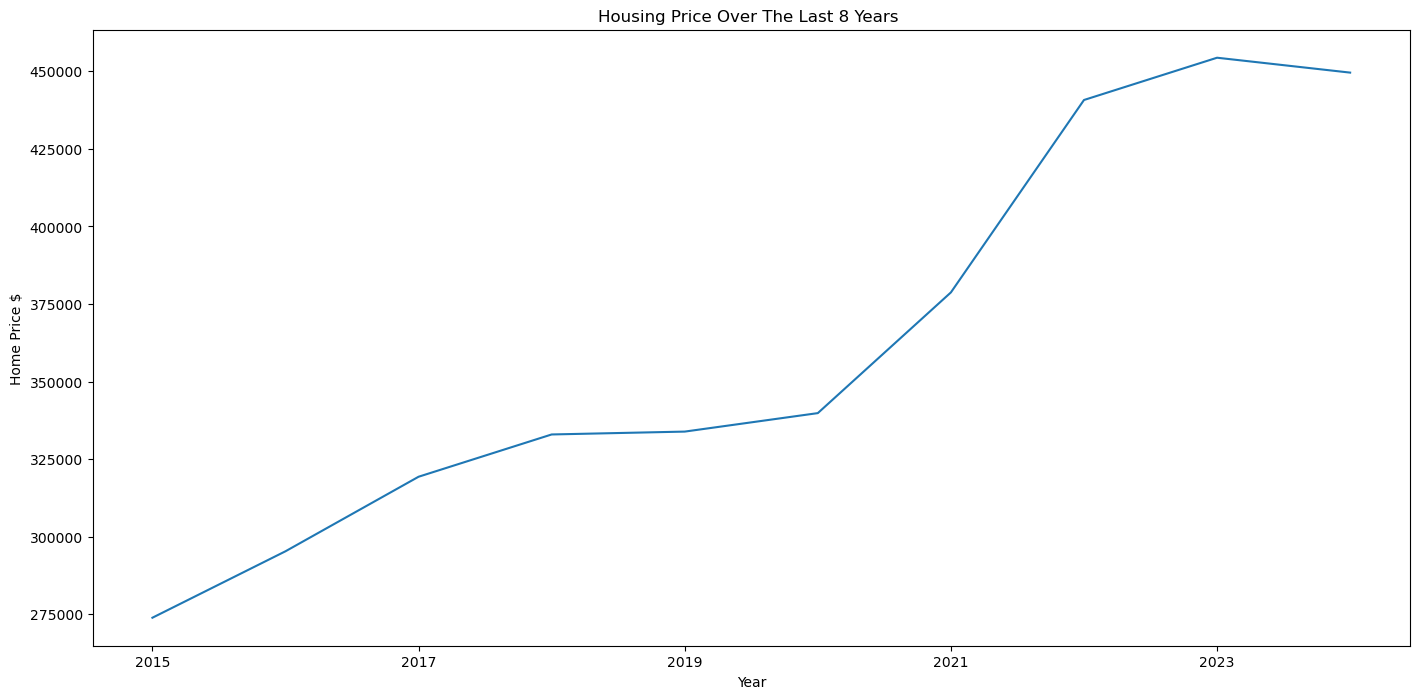

In [129]:
import matplotlib.pyplot as plt
df_p[75001.0].plot(figsize=(17,8))
plt.title("Housing Price Over The Last 8 Years ")
plt.xlabel('Year')
plt.ylabel('Home Price $')

In [134]:
plt.savefig('plot.jpg', dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

Text(0, 0.5, 'Home Price $')

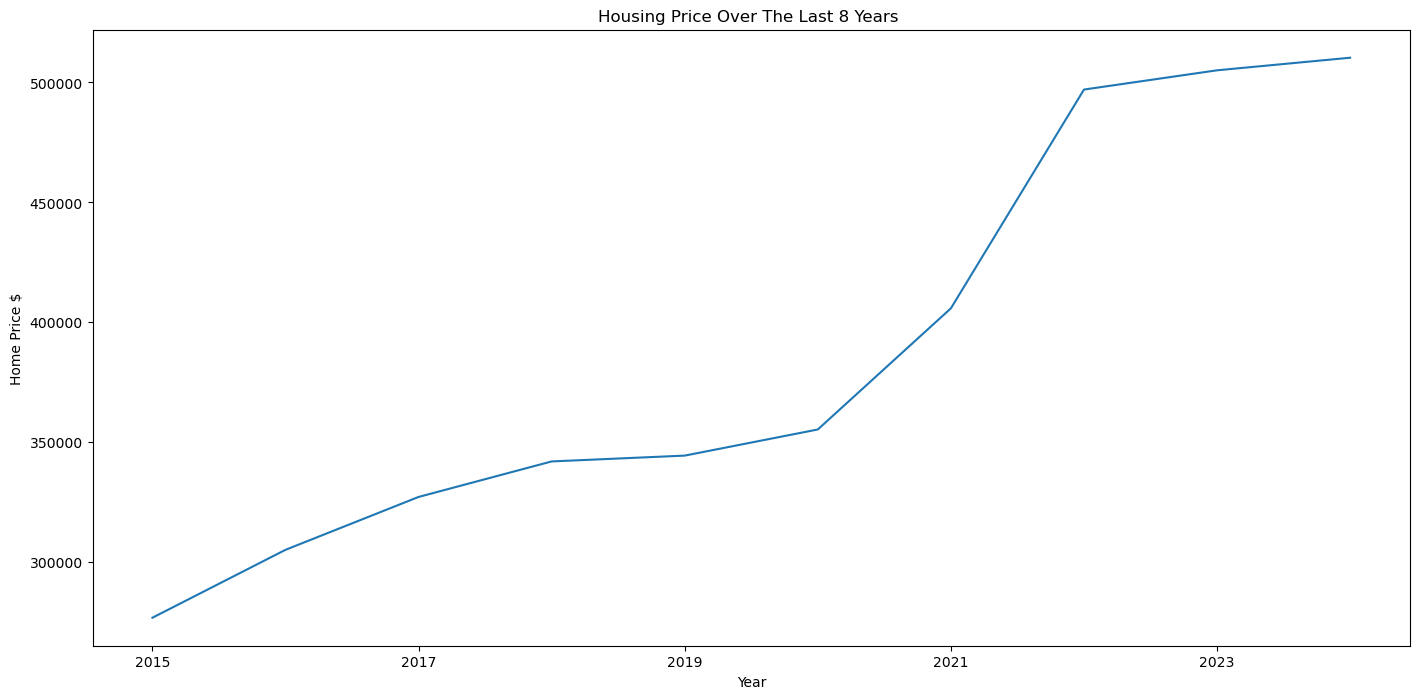

In [141]:
import matplotlib.pyplot as plt
df_p[75010.0].plot(figsize=(17,8))
plt.title("Housing Price Over The Last 8 Years ")
plt.xlabel('Year')
plt.ylabel('Home Price $')

In [138]:
plt.savefig('example.jpg', dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>